# Project Overview:

Telangana is one of India’s leading states and has published its tourism data under its open data policy.

As a data analyst, find the patterns in the given data, do additional research, and give data-informed recommendations to the Telangana government which can be used to increase their revenue by improving administrative operations.

Credits: The dataset is taken from Open Data Telangana. Thanks to Telangana Government for providing real-time datasets for public access which is a great learning asset - feel free to explore them here. (https://data.telangana.gov.in/). 

# 1. Importing all essential python libraries:

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing dometic visitors dataset of 2016, 2017, 2018, 2019:

In [62]:
dom_data_2016 = pd.read_csv(r"C:\Users\Shivam\Desktop\Python\datasets\c5-data\domestic_visitors\domestic_visitors_2016.csv")
dom_data_2016.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887


In [63]:
dom_data_2017 = pd.read_csv(r"C:\Users\Shivam\Desktop\Python\datasets\c5-data\domestic_visitors\domestic_visitors_2017.csv")
dom_data_2018 = pd.read_csv(r"C:\Users\Shivam\Desktop\Python\datasets\c5-data\domestic_visitors\domestic_visitors_2018.csv")
dom_data_2019 = pd.read_csv(r"C:\Users\Shivam\Desktop\Python\datasets\c5-data\domestic_visitors\domestic_visitors_2019.csv")

concating all data of domestic visitors in a single datafroma:

In [64]:
dom_vis_data = pd.concat([dom_data_2016, dom_data_2017, dom_data_2018, dom_data_2019])
# dom_vis_data = dom_vis_data[dom_vis_data['year']==2019]
dom_vis_data = dom_vis_data.sort_values(by=["district", 'year'], ascending=[True, True])
dom_vis_data

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
391,Yadadri Bhongir,01-08-2019,August,2019,389010
392,Yadadri Bhongir,01-09-2019,September,2019,366862
393,Yadadri Bhongir,01-10-2019,October,2019,381860
394,Yadadri Bhongir,01-11-2019,November,2019,365990


making a new column of 'visitor_type':

In [65]:
dom_vis_data['visitor_type'] = "domestic"

In [66]:
# getting information of data:
dom_vis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 395
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   district      1512 non-null   object
 1   date          1512 non-null   object
 2   month         1512 non-null   object
 3   year          1512 non-null   int64 
 4   visitors      1482 non-null   object
 5   visitor_type  1512 non-null   object
dtypes: int64(1), object(5)
memory usage: 82.7+ KB


In [67]:
# changing datatype of date to datetime:
dom_vis_data['date'] = pd.to_datetime(dom_vis_data['date'])
# dom_vis_data.date.dtype
dom_vis_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 395
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   district      1512 non-null   object        
 1   date          1512 non-null   datetime64[ns]
 2   month         1512 non-null   object        
 3   year          1512 non-null   int64         
 4   visitors      1482 non-null   object        
 5   visitor_type  1512 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 82.7+ KB


In [68]:
# changinf datatype of visitors to float:
dom_vis_data['visitors'] = pd.to_numeric(dom_vis_data['visitors'], errors='coerce') 
dom_vis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 395
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   district      1512 non-null   object        
 1   date          1512 non-null   datetime64[ns]
 2   month         1512 non-null   object        
 3   year          1512 non-null   int64         
 4   visitors      1167 non-null   float64       
 5   visitor_type  1512 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 82.7+ KB


In [69]:
dom_vis_data.district.unique()

array(['Adilabad', 'Bhadradri Kothagudem ', 'Hyderabad', 'Jagtial ',
       'Jangaon ', 'Jayashankar Bhoopalpally', 'Jogulamba Gadwal ',
       'Kamareddy ', 'Karimnagar ', 'Khammam', 'Komaram Bheem Asifabad',
       'Mahabubabad ', 'Mahbubnagar', 'Mancherial', 'Medak ', 'Medchal ',
       'Mulugu', 'Nagarkurnool ', 'Nalgonda', 'Narayanapet', 'Nirmal',
       'Nizamabad', 'Peddapalli', 'Rajanna Sircilla ', 'Ranga Reddy',
       'Sangareddy ', 'Siddipet', 'Suryapet', 'Vikarabad', 'Wanaparthy ',
       'Warangal (Rural)', 'Warangal (Urban)', 'Yadadri Bhongir'],
      dtype=object)

In [70]:
dom_vis_data.describe()

,year,visitors
count,1512.00000,1.167000e+03
mean,2017.52381,3.053485e+05
std,1.12523,9.215106e+05
min,2016.00000,0.000000e+00
25%,2017.00000,1.320500e+04
50%,2018.00000,1.192550e+05
75%,2019.00000,3.153185e+05
max,2019.00000,2.070378e+07


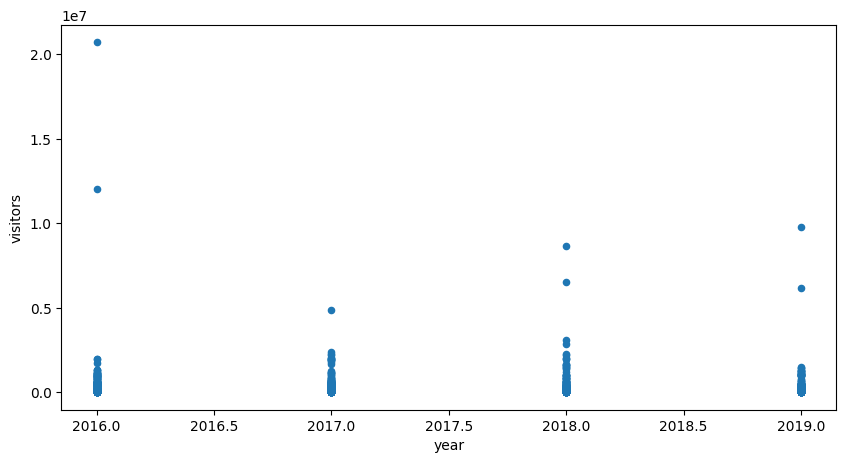

In [93]:
dom_vis_data.plot(kind="scatter", x="year", y="visitors", figsize=(10,5))
plt.title = "Total Number of domestic visitors in each year"

Importing dometic visitors dataset of 2016, 2017, 2018, 2019:

In [71]:
forgn_data_2016 = pd.read_csv(r"C:\Users\Shivam\Desktop\Python\datasets\c5-data\foreign_visitors\foreign_visitors_2016.csv")
forgn_data_2017 = pd.read_csv(r"C:\Users\Shivam\Desktop\Python\datasets\c5-data\foreign_visitors\foreign_visitors_2017.csv")
forgn_data_2018 = pd.read_csv(r"C:\Users\Shivam\Desktop\Python\datasets\c5-data\foreign_visitors\foreign_visitors_2018.csv")
forgn_data_2019 = pd.read_csv(r"C:\Users\Shivam\Desktop\Python\datasets\c5-data\foreign_visitors\foreign_visitors_2019.csv")

In [72]:
forgn_vis_data = pd.concat([forgn_data_2016, forgn_data_2017, forgn_data_2018, forgn_data_2019])
forgn_vis_data["visitor_type"] = "foreign"
forgn_vis_data

,district,date,month,year,visitors,visitor_type
0,Adilabad,01-01-2016,January,2016,2,foreign
1,Adilabad,01-02-2016,February,2016,0,foreign
2,Adilabad,01-03-2016,March,2016,2,foreign
3,Adilabad,01-04-2016,April,2016,0,foreign
4,Adilabad,01-05-2016,May,2016,0,foreign
...,...,...,...,...,...,...
391,Yadadri Bhongir,01-08-2019,August,2019,0,foreign
392,Yadadri Bhongir,01-09-2019,September,2019,0,foreign
393,Yadadri Bhongir,01-10-2019,October,2019,0,foreign
394,Yadadri Bhongir,01-11-2019,November,2019,0,foreign


In [73]:
# getting information fo forign visitors dataset:
forgn_vis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 395
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   district      1512 non-null   object
 1   date          1512 non-null   object
 2   month         1512 non-null   object
 3   year          1512 non-null   int64 
 4   visitors      1512 non-null   object
 5   visitor_type  1512 non-null   object
dtypes: int64(1), object(5)
memory usage: 82.7+ KB


In [74]:
# updating datatypes:
forgn_vis_data['date'] = pd.to_datetime(forgn_vis_data['date'])
forgn_vis_data['visitors'] = pd.to_numeric(forgn_vis_data['visitors'], errors='coerce') 

In [75]:
forgn_vis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 395
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   district      1512 non-null   object        
 1   date          1512 non-null   datetime64[ns]
 2   month         1512 non-null   object        
 3   year          1512 non-null   int64         
 4   visitors      1192 non-null   float64       
 5   visitor_type  1512 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 82.7+ KB


Text(0.5, 1.0, 'Total Number of Foreign Visitors in each Year')

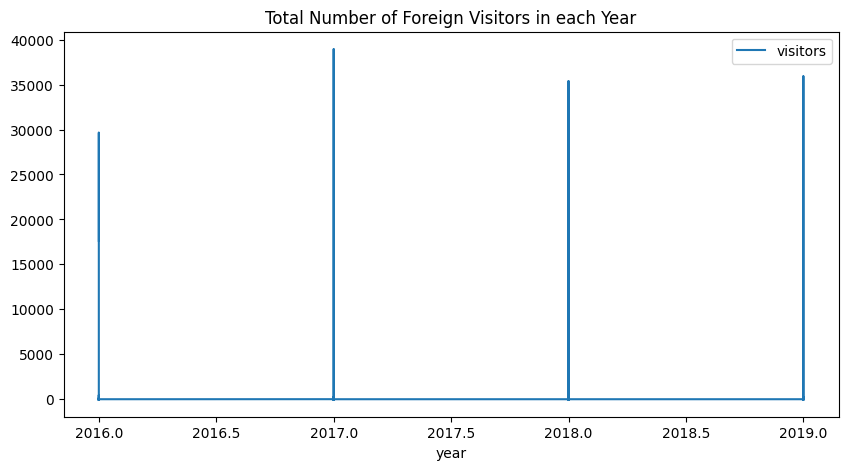

In [88]:
forgn_vis_data.plot(kind='line', x="year", y="visitors", figsize=(10,5))
plt.yLabel = "Number of Visitors"
plt.title("Total Number of Foreign Visitors in each Year")

Concatinating/appending domestic and foreign visitors dataset:

In [24]:
all_vis_data = pd.concat([dom_vis_data, forgn_vis_data])

In [25]:
# for testing purpose:
temp = all_vis_data[all_vis_data['year']==2019]
temp.visitor_type.unique()

array(['domestic', 'foreign'], dtype=object)

# 2. Primary Questions:

1. List down the top 10 districts that have the highest number of domestic visitors overall (2016 - 2019)?
(Insight: Get an overview of districts that are doing well)


In [26]:
# length of combined dataset:
data = all_vis_data
len(data)

3024

In [21]:
# for testing and validating purpose:
temp = data[ (data['district']=="Hyderabad")]
# temp = data[data['visitor_type']=="domestic"]
temp['visitors'].sum()

84945858.0

In [95]:
# 1. group all data on basis of district and show top 10 districts:
grouped_df = data.groupby("district").agg({"visitors":'sum'}).reset_index().sort_values(by="visitors", ascending=False)
grouped_df.head(10)

,district,visitors
2,Hyderabad,84945858.0
24,Rajanna Sircilla,41763276.0
32,Warangal (Urban),30735424.0
33,Yadadri Bhongir,26893080.0
1,Bhadradri Kothagudem,21600962.0
14,Medak,20542639.0
5,Jayashankar Bhoopalpally,19634117.0
12,Mahbubnagar,17182400.0
21,Nirmal,13315798.0
3,Jagtial,11303514.0


<AxesSubplot: xlabel='district'>

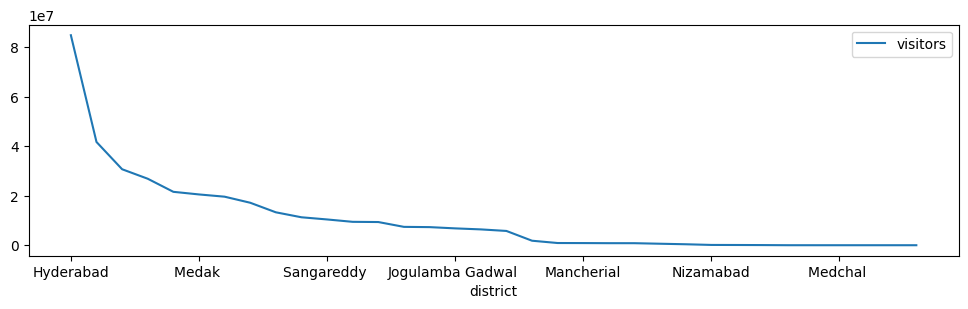

In [98]:
grouped_df.plot(kind="line", x="district", y="visitors", figsize=(12,3))

2.	List down the top 3 districts based on compounded annual growth rate (CAGR) of visitors between (2016 - 2019)?
(Insight: Districts that are growing)


In [23]:
data = all_vis_data

# testing purpose:
ansD = data[(data['year']==2016) & (data['district']=="Hyderabad") & (data['visitor_type']=="domestic")]['visitors'].sum()
ansF = data[(data['year']==2016) & (data['district']=="Hyderabad") & (data['visitor_type']=="foreign")]['visitors'].sum()
print("dom vis sum : ", ansD)
print("forgn vis sum: ", ansF)
print(ansD+ansF)

dom vis sum :  23394705.0
forgn vis sum:  163631.0
23558336.0


In [29]:
# 1. group all data on basis of district and year:
grouped_df = data.groupby(['district', 'year']).agg({"visitors":"sum"}).reset_index()
grouped_df

,district,year,visitors
0,Adilabad,2016,5075567.0
1,Adilabad,2017,825391.0
2,Adilabad,2018,644748.0
3,Adilabad,2019,775901.0
4,Bhadradri Kothagudem,2016,889030.0
...,...,...,...
122,Warangal (Urban),2019,1797680.0
123,Yadadri Bhongir,2016,1728600.0
124,Yadadri Bhongir,2017,7001728.0
125,Yadadri Bhongir,2018,13673378.0


In [30]:
# 2. making the pivot table for ease of calculation:
pivot_df = grouped_df.pivot(index="district", columns="year", values="visitors")
pivot_df

year,2016,2017,2018,2019
district,,,,
Adilabad,5075567.0,825391.0,644748.0,775901.0
Bhadradri Kothagudem,889030.0,4094317.0,3799878.0,12817737.0
Hyderabad,23558336.0,27407421.0,19858439.0,14121662.0
Jagtial,623077.0,3641401.0,3952921.0,3086115.0
Jangaon,40662.0,165708.0,291022.0,328890.0
Jayashankar Bhoopalpally,243486.0,1831592.0,16896464.0,662575.0
Jogulamba Gadwal,523446.0,2245704.0,2036845.0,2008290.0
Kamareddy,127.0,540.0,572.0,534.0
Karimnagar,9167468.0,123976.0,93448.0,77491.0


In [31]:
# 3. calculating cagr:
cagr_results = {}

def calculateCagr(start, end, period):
    if(start==0):
        return float("nan")
    else:
        return ((end/start)**1/period - 1)
    
for district in pivot_df.index:
    
    start_val = pivot_df.loc[district, 2016]
#     print(start_val)
    end_val = pivot_df.loc[district, 2019]
    cagr = calculateCagr(start_val, end_val, 3)
    cagr_results[district] = cagr
    
cagr_results

{'Adilabad': -0.9490433942322766,
 'Bhadradri Kothagudem ': 3.8058884402101167,
 'Hyderabad': -0.8001887456454196,
 'Jagtial ': 0.6510078208632322,
 'Jangaon ': 1.6961290639909499,
 'Jayashankar Bhoopalpally': -0.09293210561045262,
 'Jogulamba Gadwal ': 0.2788902771250521,
 'Kamareddy ': 0.40157480314960625,
 'Karimnagar ': -0.9971823917647344,
 'Khammam': -0.9058653849163638,
 'Komaram Bheem Asifabad': nan,
 'Mahabubabad ': -0.6359932953338763,
 'Mahbubnagar': -0.8982515964464604,
 'Mancherial': 10.52781338118431,
 'Medak ': -0.4751896126896127,
 'Medchal ': nan,
 'Mulugu': nan,
 'Nagarkurnool ': 0.18578526496086667,
 'Nalgonda': -0.991982080845692,
 'Narayanapet': nan,
 'Narayanpet': nan,
 'Nirmal': 0.3880050766774674,
 'Nizamabad': 1.3974956017799856,
 'Peddapalli': 0.7037607891491984,
 'Rajanna Sircilla ': 1.5776199416789436,
 'Ranga Reddy': nan,
 'Sangareddy ': 0.9507969151670952,
 'Siddipet': 1.778891369047619,
 'Suryapet': nan,
 'Vikarabad': nan,
 'Wanaparthy ': 0.65529836930615

In [32]:
# 4. making cagr dataframe:
cagr_df = pd.DataFrame(cagr_results.items(), columns=['district', 'CAGR'])
cagr_df["CAGR (%)"] = cagr_df['CAGR']%100
cagr_df = cagr_df.sort_values(by="CAGR", ascending=False)
cagr_df

,district,CAGR,CAGR (%)
13,Mancherial,10.527813,10.527813
31,Warangal (Rural),5.073883,5.073883
1,Bhadradri Kothagudem,3.805888,3.805888
27,Siddipet,1.778891,1.778891
4,Jangaon,1.696129,1.696129
24,Rajanna Sircilla,1.577620,1.577620
22,Nizamabad,1.397496,1.397496
26,Sangareddy,0.950797,0.950797
23,Peddapalli,0.703761,0.703761
30,Wanaparthy,0.655298,0.655298


In [33]:
# 5. dropping all null values:
cagr_df = cagr_df.dropna()

In [34]:
# 6. printing top 3 records:
cagr_df.head(3)

,district,CAGR,CAGR (%)
13,Mancherial,10.527813,10.527813
31,Warangal (Rural),5.073883,5.073883
1,Bhadradri Kothagudem,3.805888,3.805888


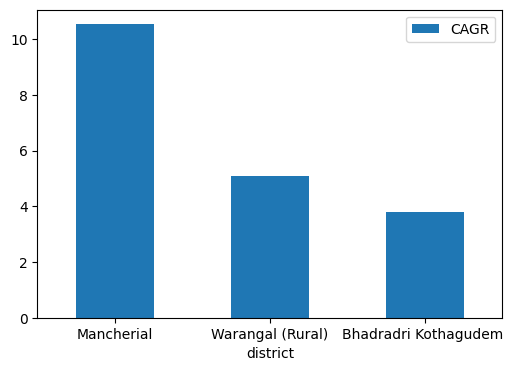

In [117]:
cagr_df.head(3).plot(kind="bar", x="district", y="CAGR", rot=0 , figsize=(6,4))
plt.title = "Top districts with high CAGR"

3.	List down the bottom 3 districts based on compounded annual growth rate (CAGR) of visitors between (2016 - 2019)?
(Insight: Districts that are declining)


In [35]:
# printing bottom 3 records:
cagr_df.tail(3)

,district,CAGR,CAGR (%)
32,Warangal (Urban),-0.976765,99.023235
18,Nalgonda,-0.991982,99.008018
8,Karimnagar,-0.997182,99.002818


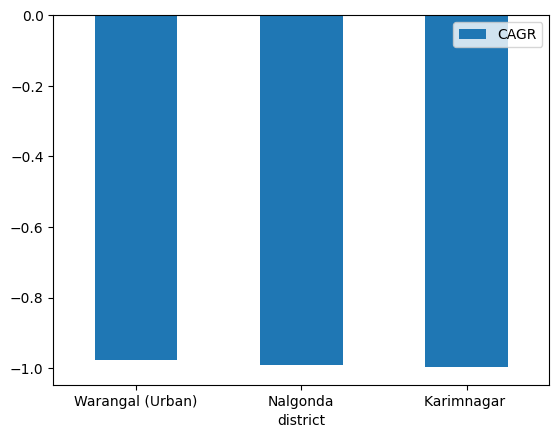

In [120]:
cagr_df.tail(3).plot(kind="bar", x="district", y="CAGR", rot=0)
plt.title = "Districts with Low CAGR"

4.	What are the peak and low season months for Hyderabad based on the data from 2016 to 2019 for Hyderabad district?
(Insight: Government can plan well for the peak seasons and boost low seasons by introducing new events)


In [123]:
data = all_vis_data
data

,district,date,month,year,visitors,visitor_type
0,Adilabad,2016-01-01,January,2016,792136.0,domestic
1,Adilabad,2016-01-02,February,2016,937820.0,domestic
2,Adilabad,2016-01-03,March,2016,582946.0,domestic
3,Adilabad,2016-01-04,April,2016,341948.0,domestic
4,Adilabad,2016-01-05,May,2016,252887.0,domestic
...,...,...,...,...,...,...
391,Yadadri Bhongir,2019-01-08,August,2019,0.0,foreign
392,Yadadri Bhongir,2019-01-09,September,2019,0.0,foreign
393,Yadadri Bhongir,2019-01-10,October,2019,0.0,foreign
394,Yadadri Bhongir,2019-01-11,November,2019,0.0,foreign


In [124]:
# 1. filtering data of 'Hyderabad' only:
# filtered_df = data[data['district']=="Hyderabad"]
filtered_df = data.query('district=="Hyderabad"')
filtered_df

,district,date,month,year,visitors,visitor_type
24,Hyderabad,2016-01-01,January,2016,1122510.0,domestic
25,Hyderabad,2016-01-02,February,2016,778748.0,domestic
26,Hyderabad,2016-01-03,March,2016,1017794.0,domestic
27,Hyderabad,2016-01-04,April,2016,1127738.0,domestic
28,Hyderabad,2016-01-05,May,2016,1287181.0,domestic
...,...,...,...,...,...,...
31,Hyderabad,2019-01-08,August,2019,22725.0,foreign
32,Hyderabad,2019-01-09,September,2019,34018.0,foreign
33,Hyderabad,2019-01-10,October,2019,28706.0,foreign
34,Hyderabad,2019-01-11,November,2019,32762.0,foreign


In [125]:
# 2. grouping all months :
grouped_df = filtered_df.groupby("month").agg({"visitors":"sum"}).reset_index().sort_values(by="visitors", ascending=False)
grouped_df

,month,visitors
6,June,16965307.0
2,December,9458632.0
10,October,6650351.0
4,January,6558551.0
0,April,6187334.0
8,May,6109590.0
1,August,5834736.0
9,November,5719659.0
5,July,5633143.0
11,September,5406363.0



Peak season months of Hyderabad are: 
       month    visitors
6       June  16965307.0
2   December   9458632.0
10   October   6650351.0

Low season months of Hyderabad are: 
        month   visitors
11  September  5406363.0
7       March  5303984.0
3    February  5118208.0


<AxesSubplot: xlabel='month'>

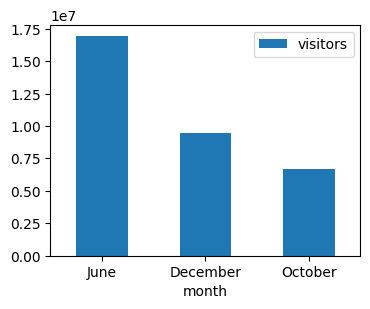

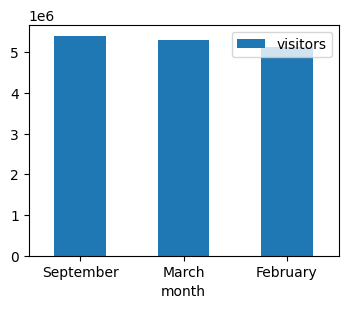

In [147]:
# 3. peak season months:
peak_months = grouped_df.head(3)
low_months = grouped_df.tail(3)

print("\nPeak season months of Hyderabad are: ")
print(peak_months)
peak_months.plot(kind="bar", x='month', y='visitors', figsize=(4,3), rot=0)

print("\nLow season months of Hyderabad are: ")
print(low_months)
low_months.plot(kind="bar", x='month', y='visitors', figsize=(4,3), rot=0)

<AxesSubplot: xlabel='month'>

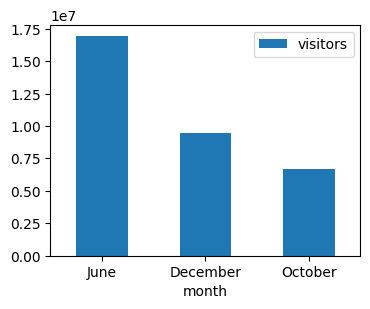

5.	Show the top & bottom 3 districts with high domestic to foreign tourist ratio?
(Insight: Government can learn from top districts and replicate the same to bottom districts which can improve the foreign visitors as foreign visitors will bring more revenue)


In [127]:
data = all_vis_data


In [39]:
# 1. grouping data on basis of district and visitor_type only:
grouped_df = data.groupby(['district', 'visitor_type']).agg({"visitors":"sum"}).reset_index()
grouped_df

,district,visitor_type,visitors
0,Adilabad,domestic,7321575.0
1,Adilabad,foreign,32.0
2,Bhadradri Kothagudem,domestic,21600962.0
3,Bhadradri Kothagudem,foreign,0.0
4,Hyderabad,domestic,83900960.0
...,...,...,...
61,Warangal (Rural),foreign,306.0
62,Warangal (Urban),domestic,30726603.0
63,Warangal (Urban),foreign,8821.0
64,Yadadri Bhongir,domestic,26893080.0


In [41]:
# 2. making pivot table of grouped data:
pivot_df = grouped_df.pivot(index="district", columns="visitor_type", values="visitors")
pivot_df

visitor_type,domestic,foreign
district,,
Adilabad,7321575.0,32.0
Bhadradri Kothagudem,21600962.0,0.0
Hyderabad,83900960.0,1044898.0
Jagtial,11303514.0,0.0
Jangaon,826280.0,2.0
Jayashankar Bhoopalpally,19632865.0,1252.0
Jogulamba Gadwal,6813340.0,945.0
Kamareddy,1773.0,0.0
Karimnagar,9462383.0,0.0


In [43]:
# for testing purpose:
ans = pivot_df.loc["Hyderabad", "domestic"]
ans

83900960.0

In [44]:
# 3. adding a new column of 'vis_ratio' which shows domestic to foreign visitors ratio.
pivot_df["vis_ratio"] = pivot_df['domestic']/pivot_df['foreign']
pivot_df = pivot_df.replace([np.inf], np.nan)

pivot_df = pivot_df.dropna()

pivot_df = pivot_df.sort_values(by='vis_ratio', ascending=False)
pivot_df

visitor_type,domestic,foreign,vis_ratio
district,,,
Nirmal,13315796.0,2.0,6.657898e+06
Jangaon,826280.0,2.0,4.131400e+05
Adilabad,7321575.0,32.0,2.287992e+05
Mancherial,867242.0,10.0,8.672420e+04
Nizamabad,116147.0,5.0,2.322940e+04
Jayashankar Bhoopalpally,19632865.0,1252.0,1.568120e+04
Nagarkurnool,7424355.0,761.0,9.756051e+03
Mahbubnagar,17180118.0,2282.0,7.528535e+03
Jogulamba Gadwal,6813340.0,945.0,7.209884e+03


In [45]:
# 4. printing top and bottom districts according to visitors ratio:
top_districts = pivot_df.head()
bottom_districts = pivot_df.tail()

print("\n Districts with high domestic to foreign tourist ratio")
print(top_districts)

print("\n Districts with low domestic to foreign tourist ratio")
print(bottom_districts)


 Districts with high domestic to foreign tourist ratio
visitor_type    domestic  foreign     vis_ratio
district                                       
Nirmal        13315796.0      2.0  6.657898e+06
Jangaon         826280.0      2.0  4.131400e+05
Adilabad       7321575.0     32.0  2.287992e+05
Mancherial      867242.0     10.0  8.672420e+04
Nizamabad       116147.0      5.0  2.322940e+04

 Districts with low domestic to foreign tourist ratio
visitor_type         domestic    foreign    vis_ratio
district                                             
Jogulamba Gadwal    6813340.0      945.0  7209.883598
Warangal (Urban)   30726603.0     8821.0  3483.346899
Mulugu              1819800.0      575.0  3164.869565
Warangal (Rural)     819162.0      306.0  2677.000000
Hyderabad          83900960.0  1044898.0    80.295837


In [176]:
# for testing purpose
x = top_districts.vis_ratio.to_numpy()

# 3. Secondary Research Questions: (Based on research and additional data)



6.	What will be the projected number of domestic and foreign tourists in Hyderabad in 2025 based on the growth rate from previous years?

(Insight: Better estimate of incoming tourists count so that government can plan the infrastructure better)


In [43]:
data = all_vis_data

In [46]:
# 1. filtering data of 'Hyderabad' district only:
filtered_df = data.loc[data['district']=="Hyderabad"]
filtered_df

,district,date,month,year,visitors,visitor_type
24,Hyderabad,2016-01-01,January,2016,1122510.0,domestic
25,Hyderabad,2016-01-02,February,2016,778748.0,domestic
26,Hyderabad,2016-01-03,March,2016,1017794.0,domestic
27,Hyderabad,2016-01-04,April,2016,1127738.0,domestic
28,Hyderabad,2016-01-05,May,2016,1287181.0,domestic
...,...,...,...,...,...,...
31,Hyderabad,2019-01-08,August,2019,22725.0,foreign
32,Hyderabad,2019-01-09,September,2019,34018.0,foreign
33,Hyderabad,2019-01-10,October,2019,28706.0,foreign
34,Hyderabad,2019-01-11,November,2019,32762.0,foreign


In [47]:
# 2. grouping data by year and visitor_type and making grouped data into pivot dataframe:
grouped_df = filtered_df.groupby(['year', 'visitor_type']).agg({"visitors":"sum"}).reset_index().sort_values(by="year")
pivot_df = grouped_df.pivot(index="year", columns='visitor_type', values='visitors')
pivot_df

visitor_type,domestic,foreign
year,,
2016,23394705.0,163631.0
2017,27160242.0,247179.0
2018,19543651.0,314788.0
2019,13802362.0,319300.0


In [48]:
# 3. calculating growth rate of each year by pct_change():
pivot_df["domestic growth rate"] = pivot_df['domestic'].pct_change()*100
pivot_df["foreign growth rate"] = pivot_df['foreign'].pct_change()*100
pivot_df

visitor_type,domestic,foreign,domestic growth rate,foreign growth rate
year,,,,
2016,23394705.0,163631.0,NaN,NaN
2017,27160242.0,247179.0,16.095681,51.058785
2018,19543651.0,314788.0,-28.043163,27.352243
2019,13802362.0,319300.0,-29.376747,1.433346


In [49]:
# 4. calculating average growth rate:
avg_dom_growth_rate = pivot_df['domestic growth rate'].mean()
avg_forgn_growth_rate = pivot_df['foreign growth rate'].mean()

print("\nAverage domestic growth rate is : ", avg_dom_growth_rate)
print("\nAverage foreign growth rate is : ", avg_forgn_growth_rate)



Average domestic growth rate is :  -13.774743359898475

Average foreign growth rate is :  26.61479100934824


In [50]:
# 5. finding the latest visitors:
latest_domestic = pivot_df["domestic"].iloc[-1]
# latest_domestic
latest_foreign = pivot_df["foreign"].iloc[-1]


In [51]:
# 6. finding the year to start projection:
projection_start_year = pivot_df.index[-1]
projection_start_year

2019

In [52]:
# 7. calculating the years to make projection;
years_to_project = 2025-projection_start_year
years_to_project

6

In [54]:
# 8. making projections of domestic and foreign visitors in 2025:
projected_domestic = latest_domestic * ((1 + avg_dom_growth_rate / 100) ** years_to_project)
projected_foreign = latest_foreign * ((1 + avg_forgn_growth_rate / 100) ** years_to_project)

print("\n Projected number of domestic tourists in 2025: ", projected_domestic.round())
print("\n Projected number of foreign tourists in 2025: ", projected_foreign.round())


 Projected number of domestic tourists in 2025:  5672316.0

 Projected number of foreign tourists in 2025:  1315545.0


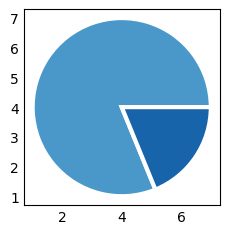

In [160]:
plt.style.use('_mpl-gallery-nogrid')

# make data
x = [projected_domestic, projected_foreign]
colors = plt.get_cmap('Blues')(np.linspace(0.6, 0.8, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 3, "edgecolor": "white"}, frame=True)

plt.show()

7. Estimate the projected revenue for Hyderabad in 2025 based on average spend per tourist (approximate data)
    foreign_tourist = Rs.5600
    domestic_tourist = Rs. 1200

In [161]:
avg_domestic_tourist_spend = 1200
avg_foreign_tourist_spend = 5600

projected_domestic_tourists = 5672316.0
projected_foreign_tourists = 1315545.0

In [162]:
# 1. calulating the total projected revenue of 2025:
total_projected_revenue = ( (projected_domestic_tourists * avg_domestic_tourist_spend) + (projected_foreign_tourists * avg_foreign_tourist_spend) )

print(f"Projeted revenue for Hyderabad in 2025 is : {int(total_projected_revenue)}")

Projeted revenue for Hyderabad in 2025 is : 14173831200


Suggested areas for further secondary research to get more insights: Crime rate, Cleanliness Ratings, Infrastructure Development Ratings etc


# 4. Conclusions:

1. Hyderabad, Rajanna Sircilla, Warangal (Urban) are among the top choices by visitors:

2. Peak season of visitors are : June, December, October

    June is because of perfect timing of Monsoon season and experiencing the greenery environment.
    In October, December - the arrival of winters and festivals like Dusshera with Ramoji Film Frestival, and sightseeing of Nizam's Museum and Charminar is the main cause of tourism attraction. 

3. Nirmal, Jangaon, Adilabad, Mancherial, Nizamabad - the districts which witnessed fair numbeer of domestic visitors but lowest foreign visitors.

    We can adapt measures and facilities of top districts like Hyderabad, Warangal(Urban), etc. to boost the tourism of foriegn visitors in such places.